#IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#DATA PREPROCESSING


In [2]:
df_calln  = pd.read_csv("call_option_data_extra.csv")
df_putn = pd.read_csv("put_option_data_extra.csv")

In [3]:
#5th May Data not Available
x = range(16767,17419)
df_calln.drop(index = x,inplace = True)
x = range(16767,17419)
df_putn.drop(index = x,inplace = True)

In [4]:
df_call = pd.read_csv("call_option_data.csv")
df_put  = pd.read_csv("put_option_data.csv")
df_call = pd.concat([df_calln,df_call])
df_call.reset_index(inplace=True)
df_call

,index,Date,Expiry,Option type,Strike Price,Open,High,Low,Close,No. of contracts,Open Int,Change in OI,Underlying Value
0,0,03-Apr-2023,06-Apr-2023,CE,33500.0,-,-,-,7128.20,-,-,-,40813.05
1,1,03-Apr-2023,06-Apr-2023,CE,34000.0,6601.00,6601.00,6601.00,6601.00,1.00,100.00,25.00,40813.05
2,2,03-Apr-2023,06-Apr-2023,CE,34500.0,-,-,-,6146.15,-,-,-,40813.05
3,3,03-Apr-2023,06-Apr-2023,CE,35000.0,5601.00,5601.00,5601.00,5601.00,1.00,225.00,25.00,40813.05
4,4,03-Apr-2023,06-Apr-2023,CE,35500.0,-,-,-,5119.95,-,50.00,-,40813.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
116210,78958,29-Dec-2023,26-Dec-2024,CE,49500.0,-,-,-,4936.25,-,-,-,48292.25
116211,78959,29-Dec-2023,26-Dec-2024,CE,51000.0,-,-,-,4181.70,-,-,-,48292.25
116212,78960,29-Dec-2023,26-Dec-2024,CE,52500.0,-,-,-,3513.25,-,-,-,48292.25
116213,78961,29-Dec-2023,26-Dec-2024,CE,54000.0,-,-,-,2928.20,-,-,-,48292.25


In [5]:
df_put = pd.concat([df_putn,df_put])
df_put.reset_index(inplace=True)
df_put

,index,Date,Expiry,Option type,Strike Price,Open,High,Low,Close,No. of contracts,Open Int,Change in OI,Underlying Value
0,0,03-Apr-2023,06-Apr-2023,PE,33500.0,2.45,2.75,1.30,1.40,216508.00,824825.00,205325.00,40813.05
1,1,03-Apr-2023,06-Apr-2023,PE,34000.0,2.95,3.00,1.40,1.55,74626.00,269100.00,22575.00,40813.05
2,2,03-Apr-2023,06-Apr-2023,PE,34500.0,3.05,3.20,1.65,1.85,47432.00,207825.00,12125.00,40813.05
3,3,03-Apr-2023,06-Apr-2023,PE,35000.0,2.90,3.35,1.75,1.90,60487.00,343900.00,-81450.00,40813.05
4,4,03-Apr-2023,06-Apr-2023,PE,35500.0,4.00,4.00,1.95,2.20,53917.00,238700.00,-4250.00,40813.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
116324,79071,29-Dec-2023,26-Dec-2024,PE,49500.0,-,-,-,2461.35,-,-,-,48292.25
116325,79072,29-Dec-2023,26-Dec-2024,PE,51000.0,-,-,-,3101.75,-,-,-,48292.25
116326,79073,29-Dec-2023,26-Dec-2024,PE,52500.0,-,-,-,3828.25,-,-,-,48292.25
116327,79074,29-Dec-2023,26-Dec-2024,PE,54000.0,-,-,-,4638.15,-,-,-,48292.25


In [6]:
df_call['Underlying Value  '] = df_call['Underlying Value  '].astype(float)
df_put['Underlying Value  '] = df_put['Underlying Value  '].astype(float)

In [7]:
df_call.reset_index(inplace=True)
df_call.drop(columns = ['index', 'level_0'],inplace=True)
df_call

,Date,Expiry,Option type,Strike Price,Open,High,Low,Close,No. of contracts,Open Int,Change in OI,Underlying Value
0,03-Apr-2023,06-Apr-2023,CE,33500.0,-,-,-,7128.20,-,-,-,40813.05
1,03-Apr-2023,06-Apr-2023,CE,34000.0,6601.00,6601.00,6601.00,6601.00,1.00,100.00,25.00,40813.05
2,03-Apr-2023,06-Apr-2023,CE,34500.0,-,-,-,6146.15,-,-,-,40813.05
3,03-Apr-2023,06-Apr-2023,CE,35000.0,5601.00,5601.00,5601.00,5601.00,1.00,225.00,25.00,40813.05
4,03-Apr-2023,06-Apr-2023,CE,35500.0,-,-,-,5119.95,-,50.00,-,40813.05
...,...,...,...,...,...,...,...,...,...,...,...,...
116210,29-Dec-2023,26-Dec-2024,CE,49500.0,-,-,-,4936.25,-,-,-,48292.25
116211,29-Dec-2023,26-Dec-2024,CE,51000.0,-,-,-,4181.70,-,-,-,48292.25
116212,29-Dec-2023,26-Dec-2024,CE,52500.0,-,-,-,3513.25,-,-,-,48292.25
116213,29-Dec-2023,26-Dec-2024,CE,54000.0,-,-,-,2928.20,-,-,-,48292.25


In [8]:
df_put.reset_index(inplace=True)
df_put.drop(columns = ['index', 'level_0'],inplace=True)
df_put

,Date,Expiry,Option type,Strike Price,Open,High,Low,Close,No. of contracts,Open Int,Change in OI,Underlying Value
0,03-Apr-2023,06-Apr-2023,PE,33500.0,2.45,2.75,1.30,1.40,216508.00,824825.00,205325.00,40813.05
1,03-Apr-2023,06-Apr-2023,PE,34000.0,2.95,3.00,1.40,1.55,74626.00,269100.00,22575.00,40813.05
2,03-Apr-2023,06-Apr-2023,PE,34500.0,3.05,3.20,1.65,1.85,47432.00,207825.00,12125.00,40813.05
3,03-Apr-2023,06-Apr-2023,PE,35000.0,2.90,3.35,1.75,1.90,60487.00,343900.00,-81450.00,40813.05
4,03-Apr-2023,06-Apr-2023,PE,35500.0,4.00,4.00,1.95,2.20,53917.00,238700.00,-4250.00,40813.05
...,...,...,...,...,...,...,...,...,...,...,...,...
116324,29-Dec-2023,26-Dec-2024,PE,49500.0,-,-,-,2461.35,-,-,-,48292.25
116325,29-Dec-2023,26-Dec-2024,PE,51000.0,-,-,-,3101.75,-,-,-,48292.25
116326,29-Dec-2023,26-Dec-2024,PE,52500.0,-,-,-,3828.25,-,-,-,48292.25
116327,29-Dec-2023,26-Dec-2024,PE,54000.0,-,-,-,4638.15,-,-,-,48292.25


#OPTION PRICE DATA ANALYSIS

In [9]:
#!pip install py_vollib
from py_vollib.black_scholes import black_scholes as bs
from py_vollib.black_scholes.greeks.analytical import delta, gamma, vega, theta, rho

In [10]:
import pandas as pd
import numpy as np
import scipy.stats as si

#Black-Scholes option price model
def black_scholes(option_type, S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    if option_type == 'ce':
        return S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif option_type == 'pe':
        return K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0) - S * si.norm.cdf(-d1, 0.0, 1.0)
    else:
        raise ValueError("Option type must be 'call' or 'put'")



#Implied volatility using the binary search
def calculate_implied_vol(option_type, S, K, T, r, market_price, tol=1, max_iter=100):
    lower_vol = 0.01
    upper_vol = 2.0
    iterations = 0
    tol = market_price*0.001
    while iterations < max_iter:
        mid_vol = (lower_vol + upper_vol) / 2.0
        price = black_scholes(option_type, S, K, T, r, mid_vol)
        if abs(price - market_price) < tol:
            return mid_vol
        if price < market_price:
            lower_vol = mid_vol
        else:
            upper_vol = mid_vol
        iterations += 1

    return np.nan

In [11]:
df_call['Date  '] = pd.to_datetime(df_call['Date  '])
df_call['Expiry  '] = pd.to_datetime(df_call['Expiry  '])

implied_volatility_list_call = []
for index, row in df_call.iterrows():
    option_type = row['Option type  '].lower()
    S = row['Underlying Value  ']
    K = row['Strike Price  ']
    T = (row['Expiry  '] - row['Date  ']).days / 365.0
    r = 0.05
    market_price = row['Close  ']

    implied_volatility = calculate_implied_vol(option_type, S, K, T, r, market_price)
    implied_volatility_list_call.append(implied_volatility)

df_call['Implied Volatility'] = implied_volatility_list_call
df_call

/var/folders/m8/tywz14gn6rv_lz8t0pr203rr0000gn/T/ipykernel_72801/2563232878.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))


,Date,Expiry,Option type,Strike Price,Open,High,Low,Close,No. of contracts,Open Int,Change in OI,Underlying Value,Implied Volatility
0,2023-04-03,2023-04-06,CE,33500.0,-,-,-,7128.20,-,-,-,40813.05,NaN
1,2023-04-03,2023-04-06,CE,34000.0,6601.00,6601.00,6601.00,6601.00,1.00,100.00,25.00,40813.05,NaN
2,2023-04-03,2023-04-06,CE,34500.0,-,-,-,6146.15,-,-,-,40813.05,NaN
3,2023-04-03,2023-04-06,CE,35000.0,5601.00,5601.00,5601.00,5601.00,1.00,225.00,25.00,40813.05,NaN
4,2023-04-03,2023-04-06,CE,35500.0,-,-,-,5119.95,-,50.00,-,40813.05,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
116210,2023-12-29,2024-12-26,CE,49500.0,-,-,-,4936.25,-,-,-,48292.25,0.227656
116211,2023-12-29,2024-12-26,CE,51000.0,-,-,-,4181.70,-,-,-,48292.25,0.223770
116212,2023-12-29,2024-12-26,CE,52500.0,-,-,-,3513.25,-,-,-,48292.25,0.220126
116213,2023-12-29,2024-12-26,CE,54000.0,-,-,-,2928.20,-,-,-,48292.25,0.217211


In [12]:
df_put['Date  '] = pd.to_datetime(df_put['Date  '])
df_put['Expiry  '] = pd.to_datetime(df_put['Expiry  '])

implied_volatility_list_put = []
for index, row in df_put.iterrows():
    option_type = row['Option type  '].lower()
    S = row['Underlying Value  ']
    K = row['Strike Price  ']
    T = (row['Expiry  '] - row['Date  ']).days / 365.0
    r = 0.05
    market_price = row['Close  ']

    implied_volatility_put = calculate_implied_vol(option_type, S, K, T, r, market_price)
    implied_volatility_list_put.append(implied_volatility)

df_put['Implied Volatility'] = implied_volatility_list_put
df_put

/var/folders/m8/tywz14gn6rv_lz8t0pr203rr0000gn/T/ipykernel_72801/2563232878.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))


,Date,Expiry,Option type,Strike Price,Open,High,Low,Close,No. of contracts,Open Int,Change in OI,Underlying Value,Implied Volatility
0,2023-04-03,2023-04-06,PE,33500.0,2.45,2.75,1.30,1.40,216508.00,824825.00,205325.00,40813.05,0.214781
1,2023-04-03,2023-04-06,PE,34000.0,2.95,3.00,1.40,1.55,74626.00,269100.00,22575.00,40813.05,0.214781
2,2023-04-03,2023-04-06,PE,34500.0,3.05,3.20,1.65,1.85,47432.00,207825.00,12125.00,40813.05,0.214781
3,2023-04-03,2023-04-06,PE,35000.0,2.90,3.35,1.75,1.90,60487.00,343900.00,-81450.00,40813.05,0.214781
4,2023-04-03,2023-04-06,PE,35500.0,4.00,4.00,1.95,2.20,53917.00,238700.00,-4250.00,40813.05,0.214781
...,...,...,...,...,...,...,...,...,...,...,...,...,...
116324,2023-12-29,2024-12-26,PE,49500.0,-,-,-,2461.35,-,-,-,48292.25,0.214781
116325,2023-12-29,2024-12-26,PE,51000.0,-,-,-,3101.75,-,-,-,48292.25,0.214781
116326,2023-12-29,2024-12-26,PE,52500.0,-,-,-,3828.25,-,-,-,48292.25,0.214781
116327,2023-12-29,2024-12-26,PE,54000.0,-,-,-,4638.15,-,-,-,48292.25,0.214781


In [13]:
#Removing NaN values from the dataframe
df_call.dropna(inplace=True)
df_call.reset_index(inplace=True)
df_call.drop(columns = ['index'],inplace=True)

df_put.dropna(inplace=True)
df_put.reset_index(inplace=True)
df_put.drop(columns = ['index'],inplace=True)

In [14]:
!pip install QuantLib
import QuantLib as ql
import pandas as pd

# Function to calculate option Greeks
def calculate_greeks(option_type, underlying_price, strike_price, risk_free_rate, volatility, expiry):
    if option_type == 'CE':
        option_type = 'c'
    elif option_type == 'PE':
        option_type = 'p'
    else:
        raise ValueError("Option type must be 'call' or 'put'")

    delta_val = delta(option_type, underlying_price, strike_price, expiry, risk_free_rate, volatility)
    gamma_val = gamma(option_type, underlying_price, strike_price, expiry, risk_free_rate, volatility)
    theta_val = theta(option_type, underlying_price, strike_price, expiry, risk_free_rate, volatility)
    vega_val = vega(option_type, underlying_price, strike_price, expiry, risk_free_rate, volatility)
    rho_val = rho(option_type, underlying_price, strike_price, expiry, risk_free_rate, volatility)

    return {'Delta': delta_val, 'Gamma': gamma_val, 'Theta': theta_val, 'Vega': vega_val, 'Rho': rho_val}


In [15]:
greeks_data_call = []
for index, row in df_call.iterrows():
    option_type = row['Option type  ']
    underlying_price = row['Underlying Value  ']
    strike_price = row['Strike Price  ']
    risk_free_rate = 0.05  # Example risk-free rate
    volatility = row['Implied Volatility']
    expiry = (pd.to_datetime(row['Expiry  ']) - pd.to_datetime(row['Date  '])).days / 365.0
    greeks = calculate_greeks(option_type, underlying_price, strike_price, risk_free_rate, volatility, expiry)
    greeks_data_call.append(greeks)

greeks_df = pd.DataFrame(greeks_data_call)

/Users/ayushdadhich/anaconda3/lib/python3.10/site-packages/py_vollib/ref_python/black_scholes/__init__.py:87: RuntimeWarning: divide by zero encountered in double_scalars
  return numerator / denominator
/Users/ayushdadhich/anaconda3/lib/python3.10/site-packages/py_vollib/black_scholes/greeks/analytical.py:190: RuntimeWarning: invalid value encountered in double_scalars
  return pdf(d_1)/(S*sigma*numpy.sqrt(t))
/Users/ayushdadhich/anaconda3/lib/python3.10/site-packages/py_vollib/black_scholes/greeks/analytical.py:144: RuntimeWarning: invalid value encountered in double_scalars
  first_term = (-S * pdf(D1) * sigma) / two_sqrt_t


In [16]:
greeks_data_put = []
for index, row in df_put.iterrows():
    option_type = row['Option type  ']
    underlying_price = row['Underlying Value  ']
    strike_price = row['Strike Price  ']
    risk_free_rate = 0.05  # Example risk-free rate
    volatility = row['Implied Volatility']
    expiry = (pd.to_datetime(row['Expiry  ']) - pd.to_datetime(row['Date  '])).days / 365.0
    greeks = calculate_greeks(option_type, underlying_price, strike_price, risk_free_rate, volatility, expiry)
    greeks_data_put.append(greeks)

greeks_df_put = pd.DataFrame(greeks_data_put)

/Users/ayushdadhich/anaconda3/lib/python3.10/site-packages/py_vollib/ref_python/black_scholes/__init__.py:87: RuntimeWarning: divide by zero encountered in double_scalars
  return numerator / denominator
/Users/ayushdadhich/anaconda3/lib/python3.10/site-packages/py_vollib/black_scholes/greeks/analytical.py:190: RuntimeWarning: invalid value encountered in double_scalars
  return pdf(d_1)/(S*sigma*numpy.sqrt(t))
/Users/ayushdadhich/anaconda3/lib/python3.10/site-packages/py_vollib/black_scholes/greeks/analytical.py:144: RuntimeWarning: invalid value encountered in double_scalars
  first_term = (-S * pdf(D1) * sigma) / two_sqrt_t


In [17]:
df_call['Delta'] = greeks_df['Delta']
df_call['Gamma'] = greeks_df['Gamma']
df_call['Theta'] = greeks_df['Theta']
df_call['Vega'] = greeks_df['Vega']
df_call['Rho'] = greeks_df['Rho']

df_put['Delta'] = greeks_df_put['Delta']
df_put['Gamma'] = greeks_df_put['Gamma']
df_put['Theta'] = greeks_df_put['Theta']
df_put['Vega'] = greeks_df_put['Vega']
df_put['Rho'] = greeks_df_put['Rho']

In [18]:
df_call

,Date,Expiry,Option type,Strike Price,Open,High,Low,Close,No. of contracts,Open Int,Change in OI,Underlying Value,Implied Volatility,Delta,Gamma,Theta,Vega,Rho
0,2023-04-03,2023-04-06,CE,37300.0,-,-,-,3540.70,-,-,-,40813.05,0.476406,0.982789,2.417097e-05,-17.527434,1.576515,3.005846
1,2023-04-03,2023-04-06,CE,37600.0,-,-,-,3287.20,-,-,-,40813.05,0.600781,0.938250,5.480606e-05,-49.932423,4.507870,2.877014
2,2023-04-03,2023-04-06,CE,37700.0,-,-,-,3204.40,-,-,-,40813.05,0.616328,0.927200,6.067636e-05,-57.336776,5.119859,2.846935
3,2023-04-03,2023-04-06,CE,39600.0,1140.50,1255.65,1006.65,1228.20,5599.00,155300.00,-33375.00,40813.05,0.072188,0.999999,2.662937e-08,-5.422737,0.000263,3.253452
4,2023-04-03,2023-04-06,CE,39900.0,850.45,968.00,738.50,935.80,29479.00,210025.00,-58200.00,40813.05,0.134375,0.971090,1.327094e-04,-10.768929,2.441443,3.180669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89676,2023-12-29,2024-12-26,CE,49500.0,-,-,-,4936.25,-,-,-,48292.25,0.227656,0.588520,3.548754e-05,-9.093271,187.380353,233.588371
89677,2023-12-29,2024-12-26,CE,51000.0,-,-,-,4181.70,-,-,-,48292.25,0.223770,0.535833,3.686958e-05,-8.869428,191.354122,215.728226
89678,2023-12-29,2024-12-26,CE,52500.0,-,-,-,3513.25,-,-,-,48292.25,0.220126,0.482339,3.759491e-05,-8.529281,191.941356,196.713517
89679,2023-12-29,2024-12-26,CE,54000.0,-,-,-,2928.20,-,-,-,48292.25,0.217211,0.429419,3.753839e-05,-8.097731,189.114803,177.117694


In [19]:
df_put

,Date,Expiry,Option type,Strike Price,Open,High,Low,Close,No. of contracts,Open Int,Change in OI,Underlying Value,Implied Volatility,Delta,Gamma,Theta,Vega,Rho
0,2023-04-03,2023-04-06,PE,33500.0,2.45,2.75,1.30,1.40,216508.00,824825.00,205325.00,40813.05,0.214781,0.000000e+00,1.719429e-26,-1.802440e-21,5.056007e-22,-4.472585e-24
1,2023-04-03,2023-04-06,PE,34000.0,2.95,3.00,1.40,1.55,74626.00,269100.00,22575.00,40813.05,0.214781,0.000000e+00,2.955222e-23,-3.096878e-18,8.689872e-19,-8.297005e-21
2,2023-04-03,2023-04-06,PE,34500.0,3.05,3.20,1.65,1.85,47432.00,207825.00,12125.00,40813.05,0.214781,0.000000e+00,2.586071e-20,-2.709007e-15,7.604378e-16,-7.875259e-18
3,2023-04-03,2023-04-06,PE,35000.0,2.90,3.35,1.75,1.90,60487.00,343900.00,-81450.00,40813.05,0.214781,-1.221245e-15,1.184364e-17,-1.240120e-12,3.482638e-13,-3.934314e-15
4,2023-04-03,2023-04-06,PE,35500.0,4.00,4.00,1.95,2.20,53917.00,238700.00,-4250.00,40813.05,0.214781,-3.160805e-13,2.913844e-15,-3.049437e-10,8.568201e-11,-1.062881e-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116324,2023-12-29,2024-12-26,PE,49500.0,-,-,-,2461.35,-,-,-,48292.25,0.214781,-4.114067e-01,3.761320e-05,-2.342386e+00,1.873725e+02,-2.323842e+02
116325,2023-12-29,2024-12-26,PE,51000.0,-,-,-,3101.75,-,-,-,48292.25,0.214781,-4.663083e-01,3.843054e-05,-1.997194e+00,1.914441e+02,-2.661901e+02
116326,2023-12-29,2024-12-26,PE,52500.0,-,-,-,3828.25,-,-,-,48292.25,0.214781,-5.202500e-01,3.851846e-05,-1.540248e+00,1.918821e+02,-3.003052e+02
116327,2023-12-29,2024-12-26,PE,54000.0,-,-,-,4638.15,-,-,-,48292.25,0.214781,-5.723273e-01,3.793256e-05,-9.862950e-01,1.889634e+02,-3.342534e+02


In [20]:
def getexpcall(dat,strike):
    a=[]
    for i in range(len(df_call)):
        if((dat == df_call['Date  '][i])  and  (strike == df_call['Strike Price  '][i])):
            a.append(i)
    return a[0]
def getexpcall_put(dat,strike):
    a=[]
    for i in range(len(df_put)):
        if((dat == df_put['Date  '][i])  and  (strike == df_put['Strike Price  '][i])):
            a.append(i)
    return a[0]

In [21]:
s = set()
d = []
for i in range(len(df_call)):
    if df_call['Date  '][i] not in s:
        d.append([df_call['Date  '][i], df_call['Underlying Value  '][i]])
        s.add(df_call['Date  '][i])

ind = []
import math

for i in range(len(d)):
    underlying = d[i][1]
    strike = math.ceil(underlying/100)*100
    x = getexpcall(d[i][0],strike)
    ind.append(x)

In [22]:
s_put = set()
d_put = []
for i in range(len(df_put)):
    if df_put['Date  '][i] not in s_put:
        d_put.append([df_put['Date  '][i], df_put['Underlying Value  '][i]])
        s_put.add(df_put['Date  '][i])

ind_put = []

for i in range(len(d_put)):
    underlying = d_put[i][1]
    strike = (math.ceil(underlying/100)-1)*100
    x = getexpcall_put(d_put[i][0],strike)
    ind_put.append(x)

In [51]:
newdf = df_call.copy()
newdf_put = df_put.copy()

In [52]:
#Dropping undesired rows from the data
#For Call
for i in range(len(df_call)):
    if i not in ind:
        newdf.drop(index = i ,inplace=True)

#For Put
for i in range(len(df_put)):
    if i not in ind_put:
        newdf_put.drop(index = i ,inplace=True)

In [53]:
newdf.reset_index(inplace=True)
newdf.drop(columns = ['index'],inplace=True)
newdf_put.reset_index(inplace=True)
newdf_put.drop(columns = ['index'],inplace=True)

In [146]:
# Diwali (Muharat Trading)
for i in range(len(newdf)-1):
    if newdf['Date  '][i] == "12-Nov-2023":
        newdf.drop(index=i,inplace=True)
        break

for i in range(len(newdf_put)-1):
    if newdf_put['Date  '][i] == "12-Nov-2023":
        newdf_put.drop(index=i,inplace=True)
        break

In [156]:
newdf.reset_index(inplace=True)
newdf.drop(columns = ['index'],inplace=True)
newdf

,Date,Expiry,Option type,Strike Price,Open,High,Low,Close,No. of contracts,Open Int,Change in OI,Underlying Value,Implied Volatility,Delta,Gamma,Theta,Vega,Rho,ret,Movement
0,03-Apr-2023,2023-04-06,CE,40900.0,188.00,202.65,117.40,171.60,1584800.00,1049500.00,417550.00,40813.05,0.138505,0.448094,0.000772,-36.267946,14.636138,1.489038,NaN,0
1,05-Apr-2023,2023-04-06,CE,41000.0,130.80,199.50,95.35,141.85,7324726.00,3829775.00,1604425.00,40999.15,0.163040,0.507137,0.001140,-72.608955,8.559906,0.565759,0.004560,1
2,06-Apr-2023,2023-04-13,CE,41100.0,305.25,422.95,215.60,243.80,353610.00,736850.00,587500.00,41041.00,0.111783,0.490779,0.000628,-20.825179,22.668071,3.816100,0.001021,1
3,10-Apr-2023,2023-04-13,CE,40900.0,394.85,394.95,160.40,194.65,3018996.00,1710075.00,1479600.00,40834.65,0.147493,0.467257,0.000728,-38.770222,14.719295,1.552250,-0.005028,0
4,11-Apr-2023,2023-04-13,CE,41400.0,119.85,172.80,51.55,151.00,3621702.00,1948675.00,478525.00,41366.50,0.132432,0.480170,0.000983,-43.094764,12.200860,1.080107,0.013024,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,22-Dec-2023,2023-12-28,CE,47500.0,700.00,912.45,281.00,375.35,1531979.00,1287675.00,111390.00,47491.85,0.147979,0.517453,0.000442,-33.241818,24.268474,3.978054,-0.007280,0
178,26-Dec-2023,2023-12-28,CE,47800.0,200.60,360.00,136.55,235.90,5310353.00,1457955.00,439230.00,47724.85,0.188303,0.465632,0.000597,-69.112453,14.041310,1.204741,0.004906,1
179,27-Dec-2023,2023-12-28,CE,48300.0,58.85,252.55,46.65,197.15,10236184.00,1698600.00,380865.00,48282.20,0.200935,0.493313,0.000786,-104.513839,10.080676,0.647155,0.011678,1
180,28-Dec-2023,2024-01-03,CE,48600.0,437.35,538.75,340.05,387.60,426051.00,511305.00,375345.00,48508.55,0.166440,0.484415,0.000385,-37.553537,24.792824,3.798962,0.004688,1


In [157]:
newdf_put.reset_index(inplace=True)
newdf_put.drop(columns = ['index'],inplace=True)
newdf_put

,Date,Expiry,Option type,Strike Price,Open,High,Low,Close,No. of contracts,Open Int,Change in OI,Underlying Value,Implied Volatility,Delta,Gamma,Theta,Vega,Rho,ret,Movement
0,03-Apr-2023,2023-04-06,PE,40800.0,350.00,399.85,189.10,211.05,1903976.00,1420375.00,1165875.00,40813.05,0.214781,-0.481151,0.000501,-50.050318,14.744777,-1.638862,0.000000,0
1,05-Apr-2023,2023-04-06,PE,40900.0,162.25,270.00,93.10,112.35,4656626.00,1856450.00,1227650.00,40999.15,0.214781,-0.407811,0.000842,-87.165295,8.331660,-0.461805,0.004560,1
2,06-Apr-2023,2023-04-06,PE,41000.0,147.15,224.95,0.05,3.80,26885470.00,5747825.00,2427925.00,41041.00,0.214781,0.000000,0.000000,0.000000,0.000000,-0.000000,0.001021,1
3,10-Apr-2023,2023-04-13,PE,40800.0,137.00,250.00,97.00,178.00,2867117.00,1595500.00,1058000.00,40834.65,0.214781,-0.470331,0.000500,-50.051514,14.728208,-1.602557,-0.005028,0
4,11-Apr-2023,2023-04-13,PE,41300.0,255.80,424.00,127.45,138.00,4133088.00,2273000.00,2027425.00,41366.50,0.214781,-0.449717,0.000602,-62.493095,12.118793,-1.031686,0.013024,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,22-Dec-2023,2023-12-28,PE,47400.0,149.75,309.70,110.70,240.55,1742399.00,546690.00,-211500.00,47491.85,0.214781,-0.454652,0.000303,-40.176632,24.134620,-3.624740,-0.007280,0
178,26-Dec-2023,2023-12-28,PE,47700.0,375.00,416.75,131.10,180.80,5004738.00,1570920.00,1148955.00,47724.85,0.214781,-0.476898,0.000525,-72.392715,14.070004,-1.262679,0.004906,1
179,27-Dec-2023,2023-12-28,PE,48200.0,393.70,420.00,83.45,107.75,6268160.00,1606275.00,1312995.00,48282.20,0.214781,-0.432752,0.000725,-103.844246,9.938511,-0.577234,0.011678,1
180,28-Dec-2023,2023-12-28,PE,48500.0,121.30,242.00,0.05,6.90,47994541.00,7385925.00,6142515.00,48508.55,0.214781,0.000000,0.000000,0.000000,0.000000,-0.000000,0.004688,1


In [158]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [159]:
df = pd.read_csv("index_data.csv")
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].dt.strftime('%d-%b-%Y')
df

,Date,Open,High,Low,Close,Volume
0,03-Jul-2023,44957.949219,45353.199219,44882.101562,45158.101562,228200
1,04-Jul-2023,45310.550781,45655.500000,45000.250000,45301.449219,463000
2,05-Jul-2023,45169.699219,45418.898438,45073.398438,45151.800781,366300
3,06-Jul-2023,45060.550781,45417.500000,45042.601562,45339.898438,244900
4,07-Jul-2023,45118.050781,45227.250000,44844.800781,44925.000000,220900
...,...,...,...,...,...,...
118,22-Dec-2023,47837.750000,48071.398438,47415.851562,47491.851562,165800
119,26-Dec-2023,47576.398438,47838.449219,47411.648438,47724.851562,118700
120,27-Dec-2023,47818.500000,48347.648438,47806.699219,48282.199219,184900
121,28-Dec-2023,48479.050781,48636.449219,48343.148438,48508.550781,391100


In [160]:
newdf.columns

Index(['Date  ', 'Expiry  ', 'Option type  ', 'Strike Price  ', 'Open  ',
       'High  ', 'Low  ', 'Close  ', 'No. of contracts  ', 'Open Int  ',
       'Change in OI  ', 'Underlying Value  ', 'Implied Volatility', 'Delta',
       'Gamma', 'Theta', 'Vega', 'Rho', 'ret', 'Movement'],
      dtype='object')

In [161]:

newdf['Date  '] = pd.to_datetime(newdf['Date  '])
newdf['Date  '] = newdf['Date  '].dt.strftime('%d-%b-%Y')
newdf

,Date,Expiry,Option type,Strike Price,Open,High,Low,Close,No. of contracts,Open Int,Change in OI,Underlying Value,Implied Volatility,Delta,Gamma,Theta,Vega,Rho,ret,Movement
0,03-Apr-2023,2023-04-06,CE,40900.0,188.00,202.65,117.40,171.60,1584800.00,1049500.00,417550.00,40813.05,0.138505,0.448094,0.000772,-36.267946,14.636138,1.489038,NaN,0
1,05-Apr-2023,2023-04-06,CE,41000.0,130.80,199.50,95.35,141.85,7324726.00,3829775.00,1604425.00,40999.15,0.163040,0.507137,0.001140,-72.608955,8.559906,0.565759,0.004560,1
2,06-Apr-2023,2023-04-13,CE,41100.0,305.25,422.95,215.60,243.80,353610.00,736850.00,587500.00,41041.00,0.111783,0.490779,0.000628,-20.825179,22.668071,3.816100,0.001021,1
3,10-Apr-2023,2023-04-13,CE,40900.0,394.85,394.95,160.40,194.65,3018996.00,1710075.00,1479600.00,40834.65,0.147493,0.467257,0.000728,-38.770222,14.719295,1.552250,-0.005028,0
4,11-Apr-2023,2023-04-13,CE,41400.0,119.85,172.80,51.55,151.00,3621702.00,1948675.00,478525.00,41366.50,0.132432,0.480170,0.000983,-43.094764,12.200860,1.080107,0.013024,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,22-Dec-2023,2023-12-28,CE,47500.0,700.00,912.45,281.00,375.35,1531979.00,1287675.00,111390.00,47491.85,0.147979,0.517453,0.000442,-33.241818,24.268474,3.978054,-0.007280,0
178,26-Dec-2023,2023-12-28,CE,47800.0,200.60,360.00,136.55,235.90,5310353.00,1457955.00,439230.00,47724.85,0.188303,0.465632,0.000597,-69.112453,14.041310,1.204741,0.004906,1
179,27-Dec-2023,2023-12-28,CE,48300.0,58.85,252.55,46.65,197.15,10236184.00,1698600.00,380865.00,48282.20,0.200935,0.493313,0.000786,-104.513839,10.080676,0.647155,0.011678,1
180,28-Dec-2023,2024-01-03,CE,48600.0,437.35,538.75,340.05,387.60,426051.00,511305.00,375345.00,48508.55,0.166440,0.484415,0.000385,-37.553537,24.792824,3.798962,0.004688,1


In [162]:

newdf_put['Date  '] = pd.to_datetime(newdf_put['Date  '])
newdf_put['Date  '] = newdf_put['Date  '].dt.strftime('%d-%b-%Y')
newdf_put

,Date,Expiry,Option type,Strike Price,Open,High,Low,Close,No. of contracts,Open Int,Change in OI,Underlying Value,Implied Volatility,Delta,Gamma,Theta,Vega,Rho,ret,Movement
0,03-Apr-2023,2023-04-06,PE,40800.0,350.00,399.85,189.10,211.05,1903976.00,1420375.00,1165875.00,40813.05,0.214781,-0.481151,0.000501,-50.050318,14.744777,-1.638862,0.000000,0
1,05-Apr-2023,2023-04-06,PE,40900.0,162.25,270.00,93.10,112.35,4656626.00,1856450.00,1227650.00,40999.15,0.214781,-0.407811,0.000842,-87.165295,8.331660,-0.461805,0.004560,1
2,06-Apr-2023,2023-04-06,PE,41000.0,147.15,224.95,0.05,3.80,26885470.00,5747825.00,2427925.00,41041.00,0.214781,0.000000,0.000000,0.000000,0.000000,-0.000000,0.001021,1
3,10-Apr-2023,2023-04-13,PE,40800.0,137.00,250.00,97.00,178.00,2867117.00,1595500.00,1058000.00,40834.65,0.214781,-0.470331,0.000500,-50.051514,14.728208,-1.602557,-0.005028,0
4,11-Apr-2023,2023-04-13,PE,41300.0,255.80,424.00,127.45,138.00,4133088.00,2273000.00,2027425.00,41366.50,0.214781,-0.449717,0.000602,-62.493095,12.118793,-1.031686,0.013024,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,22-Dec-2023,2023-12-28,PE,47400.0,149.75,309.70,110.70,240.55,1742399.00,546690.00,-211500.00,47491.85,0.214781,-0.454652,0.000303,-40.176632,24.134620,-3.624740,-0.007280,0
178,26-Dec-2023,2023-12-28,PE,47700.0,375.00,416.75,131.10,180.80,5004738.00,1570920.00,1148955.00,47724.85,0.214781,-0.476898,0.000525,-72.392715,14.070004,-1.262679,0.004906,1
179,27-Dec-2023,2023-12-28,PE,48200.0,393.70,420.00,83.45,107.75,6268160.00,1606275.00,1312995.00,48282.20,0.214781,-0.432752,0.000725,-103.844246,9.938511,-0.577234,0.011678,1
180,28-Dec-2023,2023-12-28,PE,48500.0,121.30,242.00,0.05,6.90,47994541.00,7385925.00,6142515.00,48508.55,0.214781,0.000000,0.000000,0.000000,0.000000,-0.000000,0.004688,1


In [163]:
newdf['ret'] = newdf['Underlying Value  '].pct_change()
newdf['Movement'] = np.where(newdf['ret']>0,1,0)
newdf['Movement']

0      0
1      1
2      1
3      0
4      1
      ..
177    0
178    1
179    1
180    1
181    0
Name: Movement, Length: 182, dtype: int64

In [164]:
newdf_put['ret'] = newdf_put['Underlying Value  '].pct_change()
newdf_put['Movement'] = np.where(newdf_put['ret']>0,1,0)
newdf_put['Movement']

0      0
1      1
2      1
3      0
4      1
      ..
177    0
178    1
179    1
180    1
181    0
Name: Movement, Length: 182, dtype: int64

In [165]:
#Calculating the starting index for date 3rd July 2023
for i in range(len(newdf)):
    if newdf['Date  '][i] == "03-Jul-2023":
        start = i
        break

In [166]:
start

59

In [167]:
for i in range(len(newdf_put)):
    if newdf_put['Date  '][i] == "03-Jul-2023":
        start_put = i
        break

In [168]:
start_put

59

In [169]:
#Replacing Nan Values with zero
newdf_put.fillna(0, inplace=True)

In [170]:
nnewdf = newdf.copy()

In [171]:
nnewdf['Put Close'] = newdf_put['Close  ']
nnewdf['Put No. of contacts'] = newdf_put['No. of contracts  ']
nnewdf['Put Open Int'] = newdf_put['Open Int  ']
nnewdf['Put Change in OI'] = newdf_put['Change in OI  ']
nnewdf['Put Implied Volatility'] = newdf_put['Implied Volatility']
nnewdf['Put Strike Price'] = newdf_put['Strike Price  ']
nnewdf['Put Delta'] = newdf_put['Delta']
nnewdf['Put Gamma'] = newdf_put['Gamma']
nnewdf['Put Theta'] = newdf_put['Theta']
nnewdf['Put Vega'] = newdf_put['Vega']
nnewdf['Put Rho'] = newdf_put['Rho']
nnewdf['Put Open'] = newdf_put['Open  ']
nnewdf['Put Low'] = newdf_put['Low  ']
nnewdf['Put High'] = newdf_put['High  ']

In [172]:
nnewdf['Put No. of contacts'] = nnewdf['Put No. of contacts'].astype(float)

In [173]:
nnewdf['Put Open Int'] = nnewdf['Put Open Int'].astype(float)

In [174]:
nnewdf['Put Change in OI'] = nnewdf['Put Change in OI'].astype(float)

In [175]:
nnewdf['Put Open'] = nnewdf['Put Open'].astype(float)

In [176]:
nnewdf['Put Low'] = nnewdf['Put Low'].astype(float)

In [177]:
nnewdf['Put High'] = nnewdf['Put High'].astype(float)

In [178]:
nnewdf['Open  '] = nnewdf['Open  '].astype(float)

In [179]:
nnewdf['High  '] = nnewdf['High  '].astype(float)

In [180]:
nnewdf['Low  '] = nnewdf['Low  '].astype(float)

In [181]:
nnewdf['No. of contracts  '] = nnewdf['No. of contracts  '].astype(float)

In [182]:
nnewdf['Open Int  '] = nnewdf['Open Int  '].astype(float)

In [183]:
nnewdf['Change in OI  '] = nnewdf['Change in OI  '].astype(float)

In [184]:
nnewdf['pcr'] = nnewdf['Put No. of contacts'] / nnewdf['No. of contracts  ']

In [185]:
nnndf = nnewdf.copy()

In [186]:
nnndf['21emaiv'] = nnndf['Implied Volatility'].ewm(span=21, adjust=False).mean()

In [187]:
nnndf['7emaiv'] = nnndf['Implied Volatility'].ewm(span=7, adjust=False).mean()

In [188]:
nnndf['21putemaiv'] = nnndf['Put Implied Volatility'].ewm(span=21, adjust=False).mean()

In [189]:
nnndf['7putemaiv'] = nnndf['Put Implied Volatility'].ewm(span=7, adjust=False).mean()

In [190]:
nnndf.columns

Index(['Date  ', 'Expiry  ', 'Option type  ', 'Strike Price  ', 'Open  ',
       'High  ', 'Low  ', 'Close  ', 'No. of contracts  ', 'Open Int  ',
       'Change in OI  ', 'Underlying Value  ', 'Implied Volatility', 'Delta',
       'Gamma', 'Theta', 'Vega', 'Rho', 'ret', 'Movement', 'Put Close',
       'Put No. of contacts', 'Put Open Int', 'Put Change in OI',
       'Put Implied Volatility', 'Put Strike Price', 'Put Delta', 'Put Gamma',
       'Put Theta', 'Put Vega', 'Put Rho', 'Put Open', 'Put Low', 'Put High',
       'pcr', '21emaiv', '7emaiv', '21putemaiv', '7putemaiv'],
      dtype='object')

In [191]:
nnndf['discpcr'] = np.where(nnndf['pcr']<1,1,0)

In [192]:
nnndf['ret2'] = (nnndf['Underlying Value  '] - nnndf['Underlying Value  '].shift(-2))

In [193]:
nnndf['ret3'] = (nnndf['Underlying Value  '] - nnndf['Underlying Value  '].shift(-3))

In [194]:
nnndf['movement2'] = np.where(nnndf['ret2'] >0,1,0)

In [195]:
nnndf['movement3'] = np.where(nnndf['ret3'] >0,1,0)

In [196]:
nnndf

,Date,Expiry,Option type,Strike Price,Open,High,Low,Close,No. of contracts,Open Int,...,pcr,21emaiv,7emaiv,21putemaiv,7putemaiv,discpcr,ret2,ret3,movement2,movement3
0,03-Apr-2023,2023-04-06,CE,40900.0,188.00,202.65,117.40,171.60,1584800.0,1049500.0,...,1.201398,0.138505,0.138505,0.214781,0.214781,0,-227.95,-21.60,0,0
1,05-Apr-2023,2023-04-06,CE,41000.0,130.80,199.50,95.35,141.85,7324726.0,3829775.0,...,0.635741,0.140735,0.144638,0.214781,0.214781,1,164.50,-367.35,1,0
2,06-Apr-2023,2023-04-13,CE,41100.0,305.25,422.95,215.60,243.80,353610.0,736850.0,...,76.031419,0.138103,0.136425,0.214781,0.214781,0,-325.50,-516.95,0,0
3,10-Apr-2023,2023-04-13,CE,40900.0,394.85,394.95,160.40,194.65,3018996.0,1710075.0,...,0.949692,0.138957,0.139192,0.214781,0.214781,1,-723.30,-1297.90,0,0
4,11-Apr-2023,2023-04-13,CE,41400.0,119.85,172.80,51.55,151.00,3621702.0,1948675.0,...,1.141200,0.138364,0.137502,0.214781,0.214781,0,-766.05,-896.05,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,22-Dec-2023,2023-12-28,CE,47500.0,700.00,912.45,281.00,375.35,1531979.0,1287675.0,...,1.137352,0.152508,0.153600,0.214781,0.214781,0,-790.35,-1016.70,0,0
178,26-Dec-2023,2023-12-28,CE,47800.0,200.60,360.00,136.55,235.90,5310353.0,1457955.0,...,0.942449,0.155762,0.162276,0.214781,0.214781,1,-783.70,-567.40,0,0
179,27-Dec-2023,2023-12-28,CE,48300.0,58.85,252.55,46.65,197.15,10236184.0,1698600.0,...,0.612353,0.159868,0.171940,0.214781,0.214781,1,-10.05,NaN,0,0
180,28-Dec-2023,2024-01-03,CE,48600.0,437.35,538.75,340.05,387.60,426051.0,511305.0,...,112.649756,0.160466,0.170565,0.214781,0.214781,0,NaN,NaN,0,0


In [197]:
nnndf[['ret', 'movement2', 'Underlying Value  ','Movement']]

,ret,movement2,Underlying Value,Movement
0,NaN,0,40813.05,0
1,0.004560,1,40999.15,1
2,0.001021,0,41041.00,1
3,-0.005028,0,40834.65,0
4,0.013024,0,41366.50,1
...,...,...,...,...
177,-0.007280,0,47491.85,0
178,0.004906,0,47724.85,1
179,0.011678,0,48282.20,1
180,0.004688,0,48508.55,1


## Combined

In [198]:
# y = nnndf['movement3'].shift(-1)
# X = nnndf[['21putemaiv' ,'21emaiv','discpcr' ,'Strike Price  ', 'Open  ',
#        'High  ', 'Low  ', 'Close  ', 'Open Int  ',
#        'Change in OI  ',  'Delta',
#        'Gamma', 'Vega',  'Put Close',
#        'Put Open Int', 'Put Change in OI',
#        'Put Strike Price', 'Put Delta', 'Put Gamma',
#         'Put Vega', 'Put Open', 'Put Low', 'Put High']]

y = nnndf['movement3'].shift(-1)
X = nnndf[['21putemaiv' ,'21emaiv','discpcr' ,'Strike Price  ',  'Delta',
       'Gamma', 'Vega',
       'Put Strike Price', 'Put Delta', 'Put Gamma',
        'Put Vega']]

# y = nnndf['movement2'].shift(-1)
# X = nnndf[['21putemaiv' ,'21emaiv','discpcr' ,'Strike Price  ', 'Open  ',
#        'High  ', 'Low  ', 'Close  ', 'Open Int  ',
#        'Change in OI  ',  'Delta',
#        'Gamma', 'Vega',  'Put Close',
#        'Put Open Int', 'Put Change in OI',
#        'Put Strike Price', 'Put Delta', 'Put Gamma',
#         'Put Vega', 'Put Open', 'Put Low', 'Put High']]



## Max returns yeilded

In [199]:
import warnings
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.svm import SVC
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.layers import LSTM, Dense, Dropout

t = 45
initial_amount = 100000.0
current_amount = initial_amount

# Backtest loop
profits = []
corpred = 0
falpred = 0
current_amounts = []
current_amounts.append(initial_amount)
inposition = False
i = start
while(i<(len(nnndf))):
    # Extract data for the rolling window
    X_window = X.iloc[i-t:i]
    y_window = y.iloc[i-t:i]

    # Split data into training and testing sets
    #X_train, X_test, y_train, y_test = train_test_split(X_window, y_window, test_size=0.2, random_state=42)

    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_window)
    #X_test_scaled = scaler.transform(X_test)

    # Train XGBoost model
    xgb_model = XGBClassifier()
    xgb_model.fit(X_train_scaled, y_window)
    
    adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=42)
    adaboost_model.fit(X_train_scaled, y_window)
    
    logistic_regression_model = LogisticRegression()
    logistic_regression_model.fit(X_train_scaled, y_window)

    # Train SVM model
    svm_model = SVC(kernel='poly')
    svm_model.fit(X_train_scaled, y_window)

    # Train Naive Bayes model
    nb_model = BernoulliNB()
    nb_model.fit(X_train_scaled, y_window)
    
    nb_modelg = GaussianNB()
    nb_modelg.fit(X_train_scaled, y_window)
    
    # Train Random Forest model
    rf_model = RandomForestClassifier(n_estimators=160, random_state=42)
    rf_model.fit(X_train_scaled, y_window)
    
    dt_model = DecisionTreeClassifier()
    dt_model.fit(X_train_scaled, y_window)
    
    # Train KNN model
    knn_model = KNeighborsClassifier()
    knn_model.fit(X_train_scaled, y_window)


    # Features for the next day
    X_next_day = X.iloc[i:i+1]
    X_next_day_scaled = scaler.transform(X_next_day)


    prediction_xgb = xgb_model.predict(X_next_day_scaled)[0]
    prediction_svm = svm_model.predict(X_next_day_scaled)[0]
    prediction_nb = nb_model.predict(X_next_day_scaled)[0]
    prediction_nbg = nb_modelg.predict(X_next_day_scaled)[0]
    prediction_rf = rf_model.predict(X_next_day_scaled)[0]
    prediction_adaboost = adaboost_model.predict(X_next_day_scaled)[0]
    prediction_logistic_regression = logistic_regression_model.predict(X_next_day_scaled)[0]
    prediction_dt = dt_model.predict(X_next_day_scaled)[0]
    prediction_knn = knn_model.predict(X_next_day_scaled)[0]


    # Ensemble predictions
    
    ensemble_prediction = (prediction_nb)
    
    
    if ensemble_prediction >= 1 and i  < (start+120) :
#         buyprice = nnndf.iloc[i]['Underlying Value  ']
        buyprice = df['Close'][i-start]
        shares_bought = current_amount / buyprice
#         sellprice = nnndf.iloc[i+1]['Underlying Value  ']
        sellprice = df['Close'][i-start + 3]
        selldate = df['Date'][i-start+3]
        profit = (sellprice - buyprice)*shares_bought
        profits.append(profit)
        current_amounts.append(current_amount)
        current_amounts.append(current_amount)
        current_amounts.append(current_amount)
        current_amount += profit
        current_amounts.append(current_amount)
        print("bought at:",buyprice,"on",df['Date'][i-start],"sold at:",sellprice,"on",selldate,"for a profit of:",profit)
        i = i+4
        if(profit>0):
            corpred+=1
        else:
            falpred+=1
    else:
        current_amounts.append(current_amount)
        i+=1
        


bought at: 45158.1015625 on 03-Jul-2023 sold at: 45339.8984375 on 06-Jul-2023 for a profit of: 402.57864859174464
bought at: 44925.0 on 07-Jul-2023 sold at: 44639.44921875 on 12-Jul-2023 for a profit of: -638.1755096854746
bought at: 44665.05078125 on 13-Jul-2023 sold at: 45410.8515625 on 18-Jul-2023 for a profit of: 1665.8297371324284
bought at: 46075.19921875 on 21-Jul-2023 sold at: 46062.3515625 on 26-Jul-2023 for a profit of: -28.28291114189018
bought at: 45468.1015625 on 28-Jul-2023 sold at: 44995.69921875 on 02-Aug-2023 for a profit of: -1053.5412119283485
bought at: 44879.5 on 04-Aug-2023 sold at: 44880.69921875 on 09-Aug-2023 for a profit of: 2.6813955883916694
bought at: 44878.3515625 on 07-Sep-2023 sold at: 45511.3515625 on 12-Sep-2023 for a profit of: 1415.4316692218968
bought at: 45909.44921875 on 13-Sep-2023 sold at: 45979.8515625 on 18-Sep-2023 for a profit of: 156.05941202036945
bought at: 45384.6015625 on 20-Sep-2023 sold at: 44766.1015625 on 25-Sep-2023 for a profit of

In [200]:
# bought at: 45158.1015625 on 03-Jul-2023 sold at: 45339.8984375 on 06-Jul-2023 for a profit of: 402.57864859174464
# bought at: 44925.0 on 07-Jul-2023 sold at: 44639.44921875 on 12-Jul-2023 for a profit of: -638.1755096854746
# bought at: 44665.05078125 on 13-Jul-2023 sold at: 45410.8515625 on 18-Jul-2023 for a profit of: 1665.8297371324284
# bought at: 46075.19921875 on 21-Jul-2023 sold at: 46062.3515625 on 26-Jul-2023 for a profit of: -28.28291114189018
# bought at: 45468.1015625 on 28-Jul-2023 sold at: 44995.69921875 on 02-Aug-2023 for a profit of: -1053.5412119283485
# bought at: 44879.5 on 04-Aug-2023 sold at: 44880.69921875 on 09-Aug-2023 for a profit of: 2.6813955883916694
# bought at: 44878.3515625 on 07-Sep-2023 sold at: 45511.3515625 on 12-Sep-2023 for a profit of: 1415.4316692218968
# bought at: 45909.44921875 on 13-Sep-2023 sold at: 45979.8515625 on 18-Sep-2023 for a profit of: 156.05941202036945
# bought at: 45384.6015625 on 20-Sep-2023 sold at: 44766.1015625 on 25-Sep-2023 for a profit of: -1388.9979050233237
# bought at: 44584.55078125 on 29-Sep-2023 sold at: 44213.3515625 on 05-Oct-2023 for a profit of: -837.0161173405578
# bought at: 43754.5 on 19-Oct-2023 sold at: 42832.0 on 25-Oct-2023 for a profit of: -2101.957130097682
# bought at: 42280.1484375 on 26-Oct-2023 sold at: 42845.94921875 on 31-Oct-2023 for a profit of: 1306.0291571391604
# bought at: 42700.94921875 on 01-Nov-2023 sold at: 43619.3984375 on 06-Nov-2023 for a profit of: 2127.241115260618
# bought at: 43658.6484375 on 08-Nov-2023 sold at: 43891.25 on 13-Nov-2023 for a profit of: 538.2494343372205
# bought at: 44201.69921875 on 15-Nov-2023 sold at: 43584.94921875 on 20-Nov-2023 for a profit of: -1417.1606895545824
# bought at: 43577.5 on 23-Nov-2023 sold at: 44566.44921875 on 29-Nov-2023 for a profit of: 2272.783999647603
# bought at: 44481.75 on 30-Nov-2023 sold at: 47012.25 on 05-Dec-2023 for a profit of: 5826.619820595887
# bought at: 46834.55078125 on 06-Dec-2023 sold at: 47314.25 on 11-Dec-2023 for a profit of: 1108.7254826186847
# bought at: 47092.25 on 13-Dec-2023 sold at: 47867.69921875 on 18-Dec-2023 for a profit of: 1800.7395381833928
# bought at: 47840.1484375 on 21-Dec-2023 sold at: 48282.19921875 on 27-Dec-2023 for a profit of: 1027.1165685380854

SyntaxError: leading zeros in decimal integer literals are not permitted; use an 0o prefix for octal integers (2890515345.py, line 1)

In [201]:
prof = 0
for c in profits:
    prof+=c

In [202]:
prof

12184.954504103624

In [203]:
per_returns = (current_amount - initial_amount )*100/initial_amount
hold_returns = (df['Close'][len(df)-1] - df['Close'][0])*100/df['Close'][0]

In [204]:
s = pd.Series(current_amounts)
s = s.pct_change()
sigma = np.std(s)
ra = np.mean(s)
rb = 0.07/252
strat_sr = (ra-rb)/sigma # Sharpe ratio

In [205]:
h = pd.Series(df['Close'])
h = h.pct_change()
sigmah = np.std(h)
rah = np.mean(h)
rb = 0.07/252
hold_sr = (rah-rb)/sigmah # Hold Sharpe ratio

In [206]:
print(f'Total Strategy Returns: {round(per_returns,2)}%')
print("Annualised Strategy Sharpe Ratio:",round(strat_sr*np.sqrt(252),2))
print("Hold Sharpe Ratio:",round(hold_sr*np.sqrt(252),2))
print(f'Buy and Hold Returns: {round(hold_returns,2)}%')
print("Accuracy is:",round(corpred*100/(corpred+falpred),2),"%")
print("Number of trades:",corpred+falpred)

Total Strategy Returns: 12.18%
Annualised Strategy Sharpe Ratio: 1.51
Hold Sharpe Ratio: 0.64
Buy and Hold Returns: 6.94%
Accuracy is: 65.0 %
Number of trades: 20


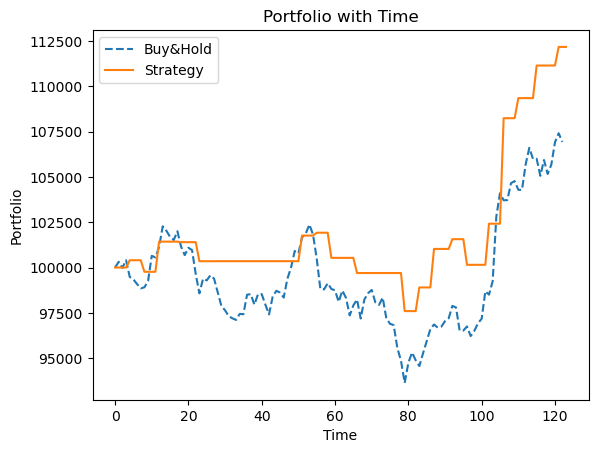

In [207]:
qq = pd.Series(current_amounts)
pp = df['Close']*2.214442215
pp.plot(kind='line',linestyle = '--',label='Buy&Hold')
qq.plot(kind='line',label='Strategy')
plt.xlabel('Time')
plt.ylabel('Portfolio')
plt.title('Portfolio with Time')
plt.legend()
plt.show()

## Steps along the way

In [208]:
y = nnndf['Movement'].shift(-1)
X = nnndf[['21putemaiv' ,'21emaiv','discpcr' ,'Strike Price  ',  'Delta',
       'Gamma', 'Vega',  
       'Put Strike Price', 'Put Delta', 'Put Gamma',
        'Put Vega']]

In [209]:
## First basic strategy we build just buying on ensemble prediction

In [210]:
import warnings
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.svm import SVC
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
t = 45
# Initial amount
initial_amount = 100000.0
current_amount = initial_amount

# Backtest loop
profits = []

current_amounts = []
current_amounts.append(initial_amount)
inposition = False
i = start
while(i<(len(newdf_put))):
    # Extract data for the rolling window
    X_window = X.iloc[i-t:i-1]
    y_window = y.iloc[i-t:i-1]

    # Split data into training and testing sets
    #X_train, X_test, y_train, y_test = train_test_split(X_window, y_window, test_size=0.2, random_state=42)

    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_window)
    #X_test_scaled = scaler.transform(X_test)

    # Train SVM model
    svm_model = SVC(kernel='poly')
    svm_model.fit(X_train_scaled, y_window)

    # Train Naive Bayes model
    nb_model = BernoulliNB()
    nb_model.fit(X_train_scaled, y_window)

    # Train Random Forest model
    rf_model = RandomForestClassifier(n_estimators=60, random_state=42)
    rf_model.fit(X_train_scaled, y_window)

    # Features for the next day
    X_next_day = X.iloc[i:i+1]
    X_next_day_scaled = scaler.transform(X_next_day)

#     # Predictions from all models for the next day
    prediction_svm = svm_model.predict(X_next_day_scaled)[0]
    prediction_nb = nb_model.predict(X_next_day_scaled)[0]
    prediction_rf = rf_model.predict(X_next_day_scaled)[0]

    # Ensemble predictions
    ensemble_prediction = (prediction_svm + prediction_nb + prediction_rf)
    
    
    if ensemble_prediction >= 1 and i != (len(newdf_put)-1):
        buyprice = df['Close'][i-start]
        shares_bought = current_amount / buyprice
        sellprice = df['Close'][i-start+1]
        profit = (sellprice - buyprice)*shares_bought
        profits.append(profit)
        current_amount += profit
        current_amounts.append(current_amount)
        print("bought at:",buyprice,"on",df['Date'][i-start],"sold at:",sellprice,"for a profit of:",profit)
        i = i+2
    else:
        i+=1


bought at: 45158.1015625 on 03-Jul-2023 sold at: 45301.44921875 for a profit of: 317.435080949103
bought at: 45339.8984375 on 06-Jul-2023 sold at: 44925.0 for a profit of: -917.9894199910441
bought at: 44860.8515625 on 10-Jul-2023 sold at: 44745.05078125 for a profit of: -256.5830353737139
bought at: 44639.44921875 on 12-Jul-2023 sold at: 44665.05078125 for a profit of: 56.860293716878594
bought at: 44819.30078125 on 14-Jul-2023 sold at: 45449.75 for a profit of: 1395.3896362625424
bought at: 45410.8515625 on 18-Jul-2023 sold at: 45669.30078125 for a profit of: 572.5223675726742
bought at: 46186.8984375 on 20-Jul-2023 sold at: 46075.19921875 for a profit of: -244.6656122404746
bought at: 45923.05078125 on 24-Jul-2023 sold at: 45845.0 for a profit of: -171.5285998377391
bought at: 46062.3515625 on 26-Jul-2023 sold at: 45679.30078125 for a profit of: -837.8408128831386
bought at: 45651.1015625 on 31-Jul-2023 sold at: 45592.5 for a profit of: -128.25743232103198
bought at: 44879.5 on 04-A

In [211]:
prof = 0
for c in profits:
    prof+=c

In [212]:
prof

3741.1881309038026

In [213]:
per_returns = (current_amount - initial_amount )*100/initial_amount
hold_returns = (df['Close'][len(df)-1] - df['Close'][0])*100/df['Close'][0]

s = pd.Series(current_amounts)
s = s.pct_change()
sigma = np.std(s)
ra = np.mean(s)
rb = 0.07/252
strat_sr = (ra-rb)/sigma # Sharpe ratio

h = pd.Series(df['Close'])
h = h.pct_change()
sigmah = np.std(h)
rah = np.mean(h)
rb = 0.07/252
hold_sr = (rah-rb)/sigmah # Hold Sharpe ratio

In [214]:
print(f'Total Strategy Returns: {round(per_returns,2)}%')


Total Strategy Returns: 3.74%


## more complex, after analysing predictions from different models and emplying sell conditions and stoplosses

If our prediction is 1(meaning the price of 3 days after will be greater than today) then we take a long position

 selling conditions are:
   if the Put-to-Call Ratio(pcr) is greater than 2 then we sell the underlying
   a time-based stoploss(tsl) is also employed, where the asset is sold after 3 days if condition is not met 
   also if on a particular day before the timed stoploss the price is as such that a stoploss value has been           hit,the asset is sold on that day

In [215]:
y = nnndf['movement3'].shift(-1)
X = nnndf[['21putemaiv' ,'21emaiv','discpcr' ,'Strike Price  ', 'Open  ',
       'High  ', 'Low  ', 'Close  ', 'Open Int  ',
       'Change in OI  ',  'Delta',
       'Gamma', 'Vega',  'Put Close',
       'Put Open Int', 'Put Change in OI',
       'Put Strike Price', 'Put Delta', 'Put Gamma',
        'Put Vega', 'Put Open', 'Put Low', 'Put High']]

In [216]:
import warnings
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.svm import SVC
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.layers import LSTM, Dense, Dropout

t = 45
initial_amount = 100000.0
current_amount = initial_amount

# Backtest loop
profits = []
corpred = 0
falpred = 0
current_amounts = []
current_amounts.append(initial_amount)
inposition = False
i = start
while(i<(len(nnndf))):
    # Extract data for the rolling window
    X_window = X.iloc[i-t:i]
    y_window = y.iloc[i-t:i]

    # Split data into training and testing sets
    #X_train, X_test, y_train, y_test = train_test_split(X_window, y_window, test_size=0.2, random_state=42)

    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_window)
    #X_test_scaled = scaler.transform(X_test)

    # Train XGBoost model
    xgb_model = XGBClassifier()
    xgb_model.fit(X_train_scaled, y_window)
    
    adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=42)
    adaboost_model.fit(X_train_scaled, y_window)
    
    logistic_regression_model = LogisticRegression()
    logistic_regression_model.fit(X_train_scaled, y_window)

    # Train SVM model
    svm_model = SVC(kernel='poly')
    svm_model.fit(X_train_scaled, y_window)

    # Train Naive Bayes model
    nb_model = BernoulliNB()
    nb_model.fit(X_train_scaled, y_window)
    
    nb_modelg = GaussianNB()
    nb_modelg.fit(X_train_scaled, y_window)
    
    # Train Random Forest model
    rf_model = RandomForestClassifier(n_estimators=160, random_state=42)
    rf_model.fit(X_train_scaled, y_window)
    
    dt_model = DecisionTreeClassifier()
    dt_model.fit(X_train_scaled, y_window)
    
    # Train KNN model
    knn_model = KNeighborsClassifier()
    knn_model.fit(X_train_scaled, y_window)


    # Features for the next day
    X_next_day = X.iloc[i:i+1]
    X_next_day_scaled = scaler.transform(X_next_day)


    prediction_xgb = xgb_model.predict(X_next_day_scaled)[0]
    prediction_svm = svm_model.predict(X_next_day_scaled)[0]
    prediction_nb = nb_model.predict(X_next_day_scaled)[0]
    prediction_nbg = nb_modelg.predict(X_next_day_scaled)[0]
    prediction_rf = rf_model.predict(X_next_day_scaled)[0]
    prediction_adaboost = adaboost_model.predict(X_next_day_scaled)[0]
    prediction_logistic_regression = logistic_regression_model.predict(X_next_day_scaled)[0]
    prediction_dt = dt_model.predict(X_next_day_scaled)[0]
    prediction_knn = knn_model.predict(X_next_day_scaled)[0]


    # Ensemble predictions
    
    ensemble_prediction = (prediction_nb)
    stoploss = 400
    
    if ensemble_prediction >= 1 and i  < (start+120) and not inposition :
        buyprice = df['Close'][i-start]
        shares_bought = current_amount / buyprice
        buydate = df['Date'][i-start]
        inposition = True
        i+=1
        hol = 0
        
    if inposition and nnndf['pcr'][i] > 2:
        sellprice = df['Close'][i-start]
        selldate = df['Date'][i-start]
        profit = (sellprice - buyprice)*shares_bought
        profits.append(profit)
        current_amounts.append(current_amount)
        current_amounts.append(current_amount)
        current_amounts.append(current_amount)
        current_amount += profit
        current_amounts.append(current_amount)
        print("bought at:",buyprice,"on",buydate,"sold at:",sellprice,"on",selldate,"for a profit of:",profit,"selling condition was met")
        i = i+1
        if(profit>0):
            corpred+=1
        else:
            falpred+=1
        inposition = False
    if inposition and hol!=3:
        hol+=1
        if shares_bought*(-df['Close'][i-start] + buyprice) >= stoploss:
            sellprice = df['Close'][i-start]
            selldate = df['Date'][i-start]
            profit = (sellprice - buyprice)*shares_bought
            profits.append(profit)
            current_amounts.append(current_amount)
            current_amounts.append(current_amount)
            current_amounts.append(current_amount)
            current_amount += profit
            current_amounts.append(current_amount)
            print("bought at:",buyprice,"on",buydate,"sold at:",sellprice,"on",selldate,"for a profit of:",profit,"due to stoploss")
            i = i+1
            if(profit>0):
                corpred+=1
            else:
                falpred+=1
            inposition = False

   
    if inposition and hol ==3:
        hol=0
        sellprice = df['Close'][i-start]
        selldate = df['Date'][i-start]
        profit = (sellprice - buyprice)*shares_bought
        profits.append(profit)
        current_amounts.append(current_amount)
        current_amounts.append(current_amount)
        current_amounts.append(current_amount)
        current_amount += profit
        current_amounts.append(current_amount)
        print("bought at:",buyprice,"on",buydate,"sold at:",sellprice,"on",selldate,"for a profit of:",profit,"Due to time based stoploss")
        i = i+1
        if(profit>0):
            corpred+=1
        else:
            falpred+=1
        inposition = False
        
            
    else:
        current_amounts.append(current_amount)
        i+=1
        


bought at: 45158.1015625 on 03-Jul-2023 sold at: 45339.8984375 on 06-Jul-2023 for a profit of: 402.57864859174464 selling condition was met
bought at: 44860.8515625 on 10-Jul-2023 sold at: 44639.44921875 on 12-Jul-2023 for a profit of: -495.51815128547065 due to stoploss
bought at: 44819.30078125 on 14-Jul-2023 sold at: 45669.30078125 on 19-Jul-2023 for a profit of: 1894.7417729068352 Due to time based stoploss
bought at: 46075.19921875 on 21-Jul-2023 sold at: 45845.0 on 25-Jul-2023 for a profit of: -508.61842699116187 due to stoploss
bought at: 45468.1015625 on 28-Jul-2023 sold at: 44995.69921875 on 02-Aug-2023 for a profit of: -1052.4111587914438 due to stoploss
bought at: 44879.5 on 04-Aug-2023 sold at: 44880.69921875 on 09-Aug-2023 for a profit of: 2.67851946028046 Due to time based stoploss
bought at: 44436.1015625 on 01-Sep-2023 sold at: 44409.1015625 on 06-Sep-2023 for a profit of: -60.90933019176353 selling condition was met
bought at: 45156.3984375 on 08-Sep-2023 sold at: 4590

In [217]:
prof = 0
for c in profits:
    prof+=c

In [218]:
prof

10667.570126152552

In [219]:
per_returns = (current_amount - initial_amount )*100/initial_amount
hold_returns = (df['Close'][len(df)-1] - df['Close'][0])*100/df['Close'][0]

s = pd.Series(current_amounts)
s = s.pct_change()
sigma = np.std(s)
ra = np.mean(s)
rb = 0.07/252
strat_sr = (ra-rb)/sigma # Sharpe ratio

h = pd.Series(df['Close'])
h = h.pct_change()
sigmah = np.std(h)
rah = np.mean(h)
rb = 0.07/252
hold_sr = (rah-rb)/sigmah # Hold Sharpe ratio

In [220]:
print(f'Total Strategy Returns: {round(per_returns,2)}%')
print("Annualised Strategy Sharpe Ratio:",round(strat_sr*np.sqrt(252),2))
print("Hold Sharpe Ratio:",round(hold_sr*np.sqrt(252),2))
print(f'Buy and Hold Returns: {round(hold_returns,2)}%')
print("Accuracy is:",round(corpred*100/(corpred+falpred),2),"%")
print("Number of trades:",corpred+falpred)

Total Strategy Returns: 10.67%
Annualised Strategy Sharpe Ratio: 0.89
Hold Sharpe Ratio: 0.64
Buy and Hold Returns: 6.94%
Accuracy is: 47.83 %
Number of trades: 23


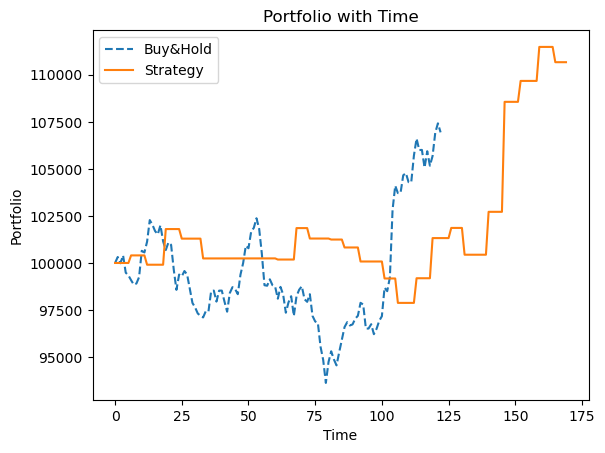

In [221]:
qq = pd.Series(current_amounts)
pp = df['Close']*2.214442215
pp.plot(kind='line',linestyle = '--',label='Buy&Hold')
qq.plot(kind='line',label='Strategy')
plt.xlabel('Time')
plt.ylabel('Portfolio')
plt.title('Portfolio with Time')
plt.legend()
plt.show()